In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('../../data/clean/combined_data.csv')
df = df.rename(columns={'Life_Expectance_at_Birth': 'life_expectancy'})
df

country  ranking  score  life_expectancy  \
0                 Albania      107   4.72             78.0   
1                 Algeria       88   5.21             77.1   
2               Argentina       47   6.09             76.6   
3                 Armenia      116   4.56             76.0   
4               Australia       11   7.23             83.0   
..                    ...      ...    ...              ...   
117               Ukraine      133   4.33             73.0   
118  United Arab Emirates       21   6.82             76.1   
119               Uruguay       33   6.29             77.1   
120                Zambia      138   4.11             62.5   
121              Zimbabwe      146   3.66             60.7   

     gdp_per_capita_ppp  hf_score  hf_rank  
0              13653.25      8.14       43  
1              11627.28      5.26      154  
2              22071.75      7.38       74  
3              14317.55      8.20       40  
4              49420.94      8.84        8  
..                  ...       ...      ...  
117            12804.96      6.86       98  
118            71782.16      6.06      131  
119            23552.84      8.36       33  
120             3372.36      6.82      102  
121             2203.40      5.60      149  

[122 rows x 7 columns]

## Distribution of Scores

Histogram or KDE (Kernel Density Estimate): Plot the distribution of the score column. This will help you understand how scores are spread across countries. You can compare it to the distribution of other columns like life_expectancy or gdp_per_capita_ppp if you want to look at relationships.
Boxplot: Boxplots can show the spread, central tendency, and any potential outliers in scores across countries.

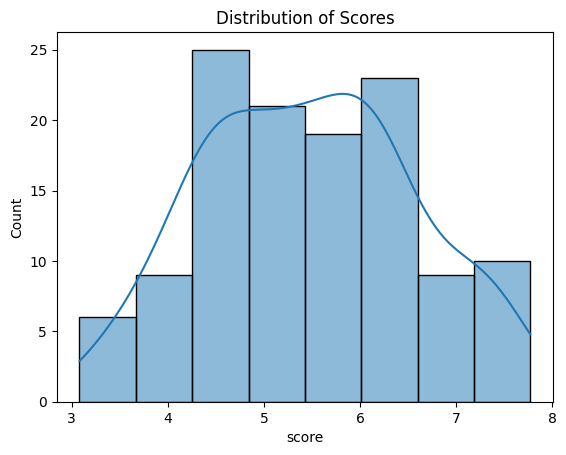

In [4]:
sns.histplot(df['score'], kde=True)
plt.title('Distribution of Scores')
plt.show()

## Life Expectancy vs. Score

Scatter Plot: Plot life_expectancy vs. score. This can reveal whether there's a relationship between a country’s life expectancy and its score, and you can color it by region or income group if that data is available.

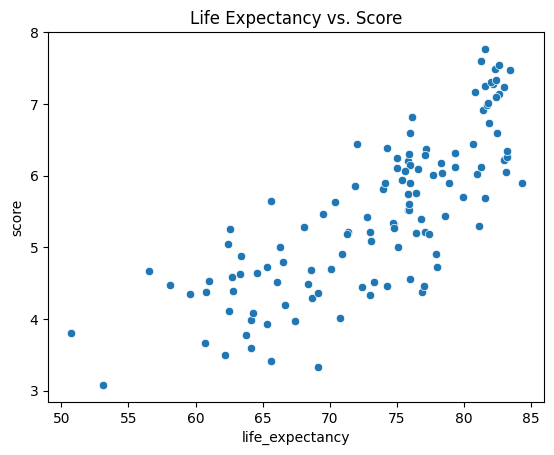

In [6]:
sns.scatterplot(x='life_expectancy', y='score', data=df)
plt.title('Life Expectancy vs. Score')
plt.show()

## GDP vs. Score

Scatter Plot: Plot gdp_per_capita_ppp vs. score. This can help assess whether richer countries tend to have higher scores.

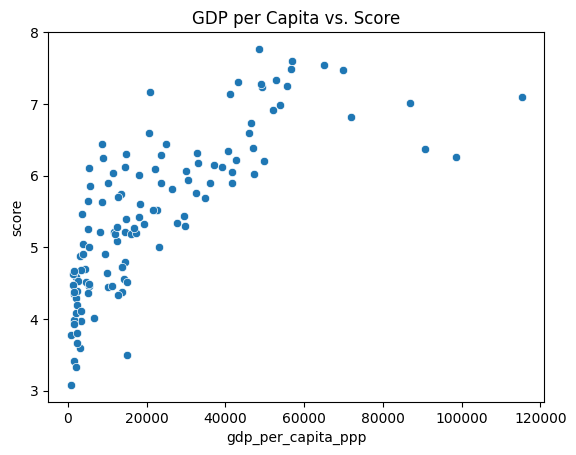

In [8]:
sns.scatterplot(x='gdp_per_capita_ppp', y='score', data=df)
plt.title('GDP per Capita vs. Score')
plt.show()

## Life Expectancy vs. GDP

Scatter Plot: Another interesting relationship is between life_expectancy and gdp_per_capita_ppp. This can show if wealthier nations generally have a higher life expectancy.

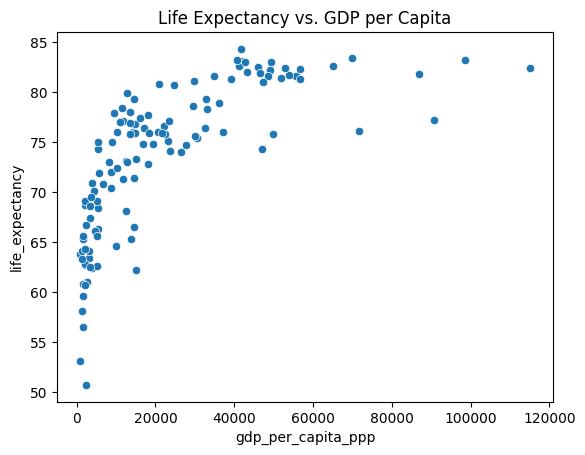

In [10]:
sns.scatterplot(x='gdp_per_capita_ppp', y='life_expectancy', data=df)
plt.title('Life Expectancy vs. GDP per Capita')
plt.show()

## Correlation Matrix

Heatmap: A heatmap of the correlation matrix can quickly show the strength of relationships between different numerical variables (e.g., score, life expectancy, GDP, etc.).

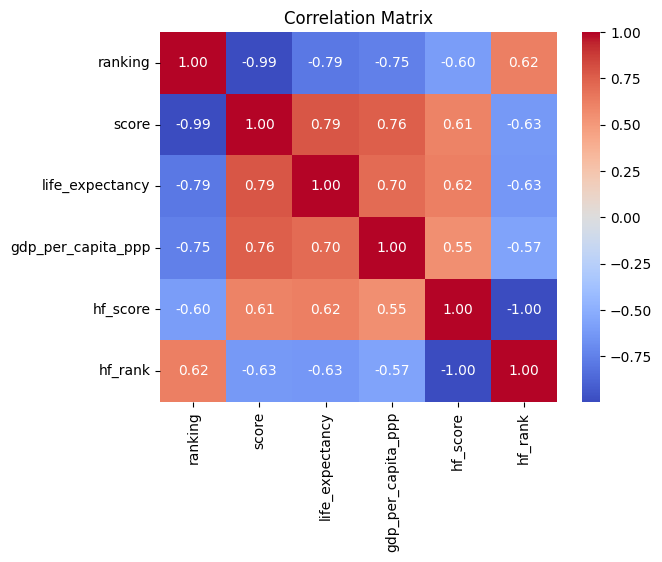

In [12]:
# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

## Score Distribution by Country

Bar Plot or Horizontal Bar Plot: For a ranking-focused analysis, plot the country vs score. You can sort the countries by score to show the highest and lowest scores.

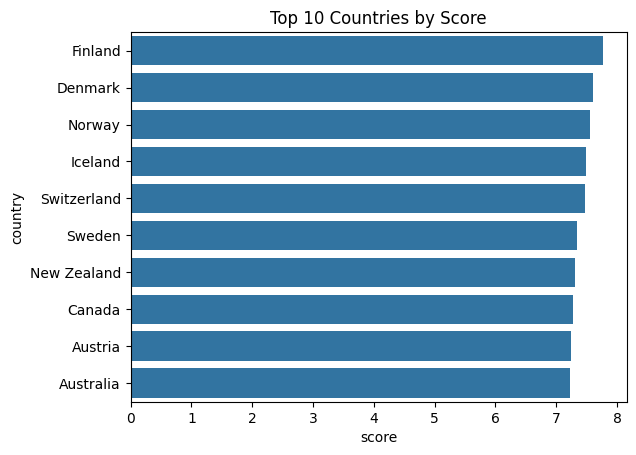

In [14]:
top_countries = df.sort_values(by='score', ascending=False).head(10)
sns.barplot(x='score', y='country', data=top_countries)
plt.title('Top 10 Countries by Score')
plt.show()

## Ranking vs. Score (Inverse Relationship)

Scatter Plot: Plot ranking vs. score. Since ranking is inversely related to the score, this plot could show the relationship more clearly, and you can look for clusters or outliers.

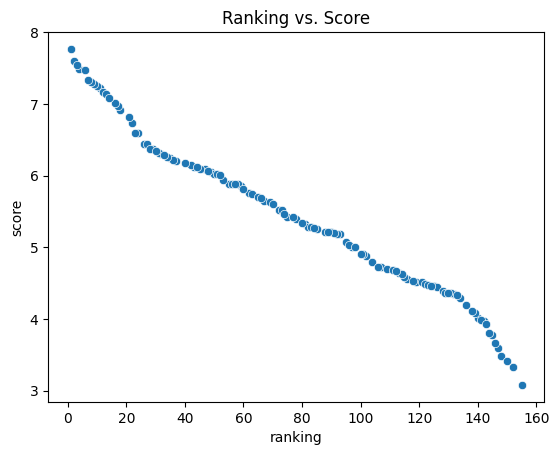

In [16]:
sns.scatterplot(x='ranking', y='score', data=df)
plt.title('Ranking vs. Score')
plt.show()

## Life Expectancy vs. Human Freedom Score

Scatter Plot: You have hf_score (Human Freedom score), which you can plot against life_expectancy to see if there’s any correlation between human freedom and life expectancy.

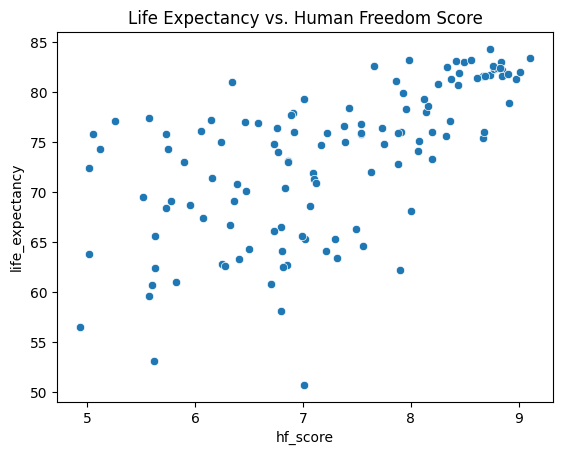

In [18]:
sns.scatterplot(x='hf_score', y='life_expectancy', data=df)
plt.title('Life Expectancy vs. Human Freedom Score')
plt.show()

## GDP vs. Human Freedom Score

Scatter Plot: Plot gdp_per_capita_ppp vs. hf_score to see if wealthier countries also tend to have a higher freedom score.

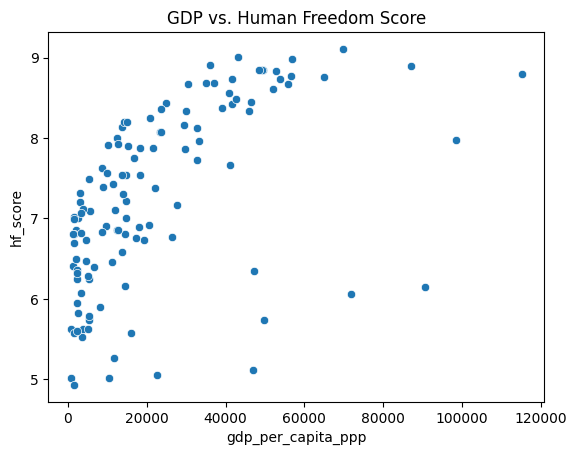

In [20]:
sns.scatterplot(x='gdp_per_capita_ppp', y='hf_score', data=df)
plt.title('GDP vs. Human Freedom Score')
plt.show()

## Top 10 or Bottom 10 Countries by Ranking

Bar Plot: Create bar plots for the top 10 and bottom 10 countries by their ranking, comparing their score, life_expectancy, or gdp_per_capita_ppp.

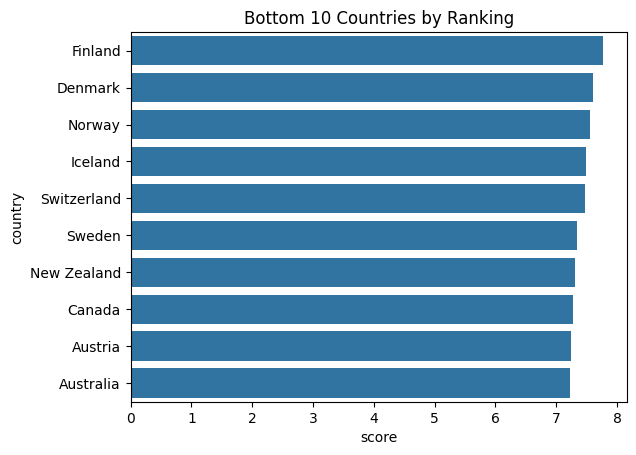

In [22]:
bottom_countries = df.sort_values(by='ranking').head(10)
sns.barplot(x='score', y='country', data=bottom_countries)
plt.title('Bottom 10 Countries by Ranking')
plt.show()

## GDP per Capita vs. Human Freedom Score by Country

Bubble Plot: Use a bubble plot where the size of the bubble represents the population or another metric to visualize the relationship between gdp_per_capita_ppp and hf_score.

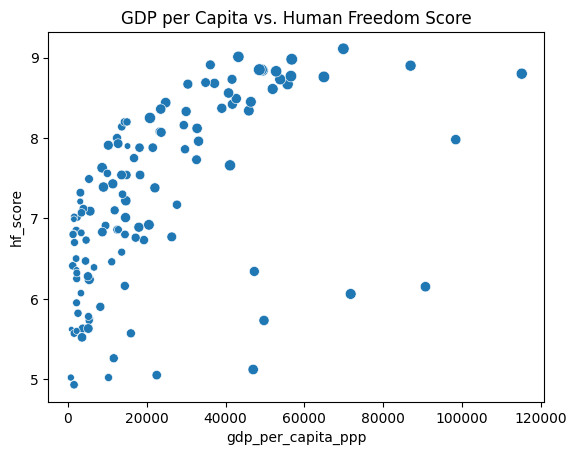

In [24]:
sns.scatterplot(x='gdp_per_capita_ppp', y='hf_score', size='score', data=df, legend=False)
plt.title('GDP per Capita vs. Human Freedom Score')
plt.show()

## Country Rank by Human Freedom Score

Horizontal Bar Plot: Plot hf_rank by country to show the ranking order of countries in terms of human freedom.

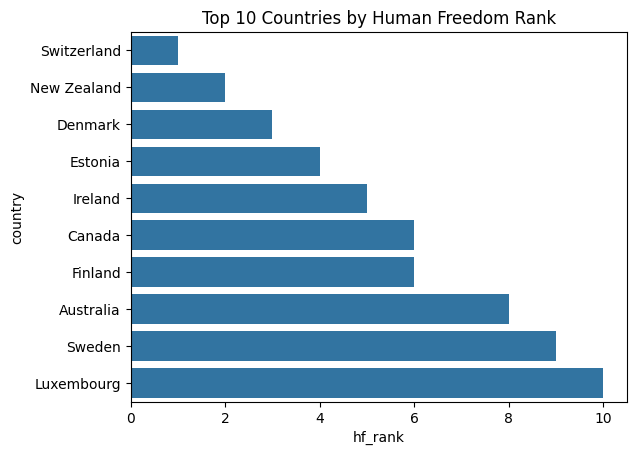

In [26]:
top_hf_countries = df.sort_values(by='hf_rank').head(10)
sns.barplot(x='hf_rank', y='country', data=top_hf_countries)
plt.title('Top 10 Countries by Human Freedom Rank')
plt.show()

## Interactive Visualizations (for more interactivity):

Plotly or Dash: If you need interactive charts, you can use Plotly for scatter plots or bar charts with tooltips, hover effects, and zoom functionalities, which is especially useful when dealing with many countries.

In [28]:
import plotly.express as px
fig = px.scatter(df, x='gdp_per_capita_ppp', y='score', color='country', hover_name='country')
fig.update_layout(title='GDP per Capita vs Happiness Score')
fig.show()

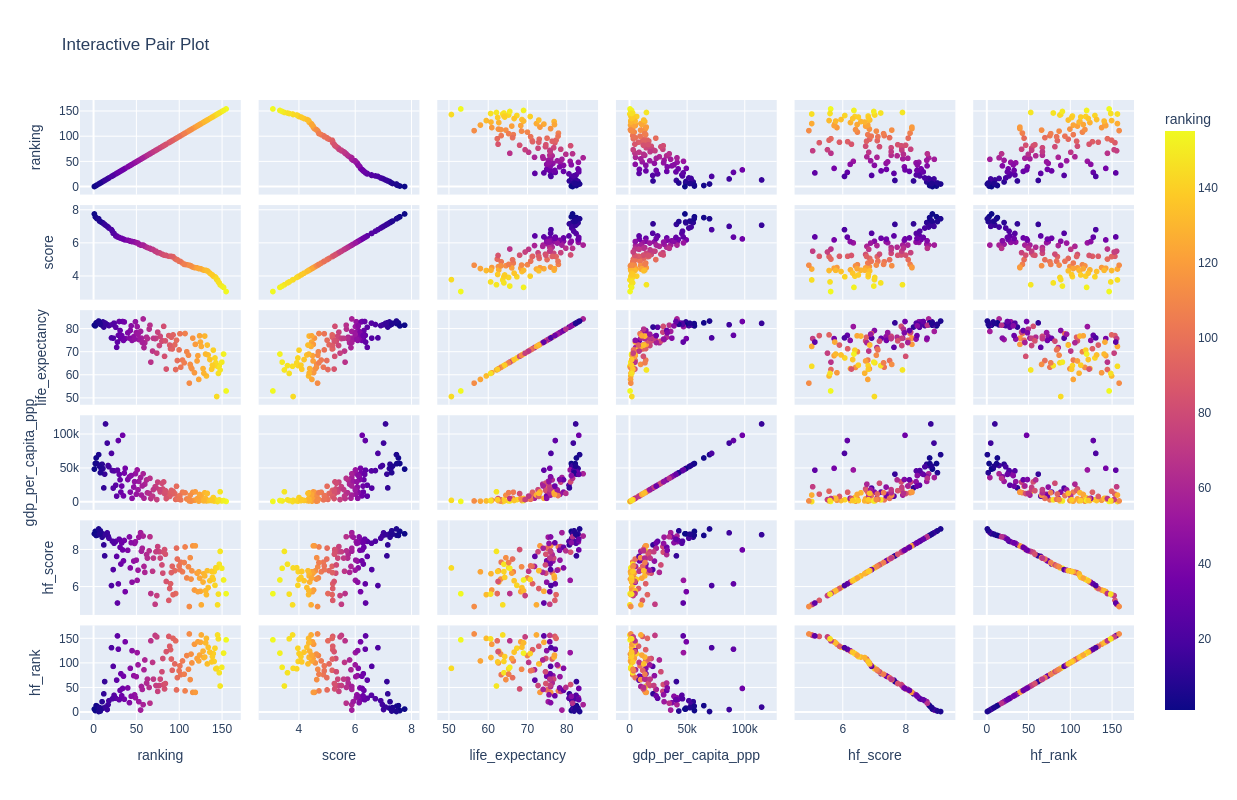

In [45]:
import plotly.express as px

# Create the scatter matrix for the numeric columns
fig = px.scatter_matrix(
    numeric_df,
    dimensions=numeric_df.columns,  # Plot all numeric columns
    color="ranking",  # Optionally, use a categorical feature for coloring the points
    title="Interactive Pair Plot"
)

fig.update_layout(
    width=800,
    height=800,
    showlegend=True
)

fig.show()

Interactive Bar Plot (Country Rankings vs Life Expectancy)

You can create a bar plot to compare life_expectancy for each country, which is also interactive. Here's an example:

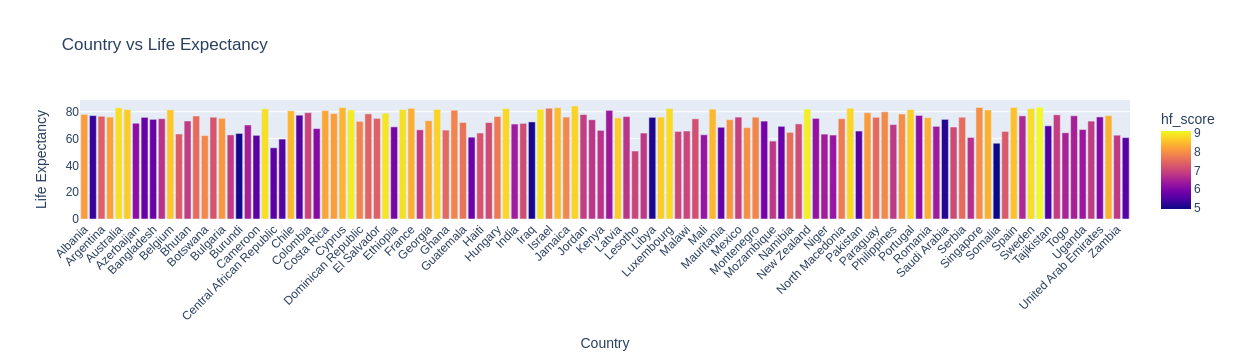

In [47]:
fig = px.bar(
    df, 
    x="country", 
    y="life_expectancy", 
    color="hf_score",  # Optionally color by another column (e.g., Human Freedom Score)
    title="Country vs Life Expectancy",
    labels={"life_expectancy": "Life Expectancy", "country": "Country"},
    hover_data=["gdp_per_capita_ppp", "hf_score"]  # Display extra data when hovering
)

fig.update_layout(
    xaxis_tickangle=-45,  # Tilt the country names for better readability
    xaxis_title="Country",
    yaxis_title="Life Expectancy",
    showlegend=True
)

fig.show()

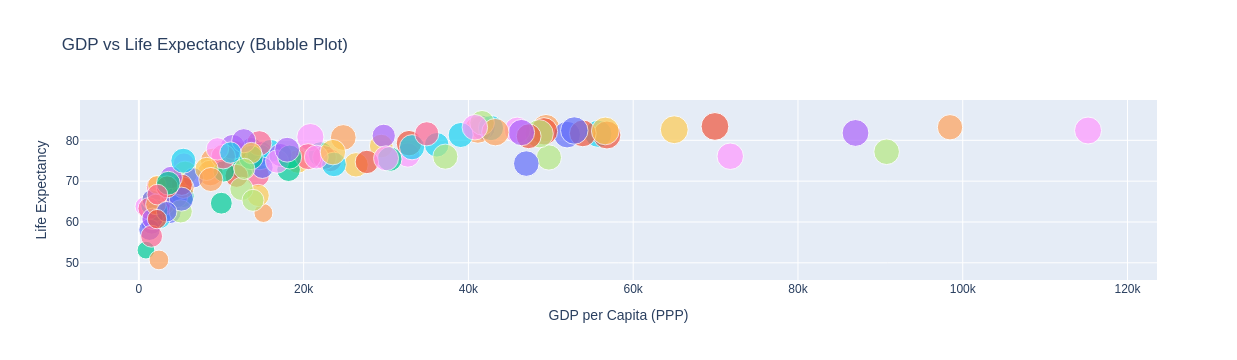

In [49]:
fig = px.scatter(
    df, 
    x="gdp_per_capita_ppp", 
    y="life_expectancy", 
    size="score",  # Size of the bubble is determined by the 'score'
    color="country",  # Color each point by country
    hover_name="country",  # Show country name when hovering
    title="GDP vs Life Expectancy (Bubble Plot)",
    labels={"gdp_per_capita_ppp": "GDP per Capita (PPP)", "life_expectancy": "Life Expectancy"}
)

fig.update_layout(
    showlegend=False,
    xaxis_title="GDP per Capita (PPP)",
    yaxis_title="Life Expectancy",
)

fig.show()